In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x=np.array([-2,-1,0,1,2])
sigmoide=1/(1+np.exp(-x))
relu=np.maximum(0,x)
tanh=np.tanh(x)
print("sigmoide",sigmoide)
print("relu",relu)
print("tanggente hiperbolica",tanh)

sigmoide [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
relu [0 0 0 1 2]
tanggente hiperbolica [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]


In [2]:
##Función math
import math
x=([-2,-1,0,1,2])
sigmoid=1/ (1+math.exp(-x))
print("sigmoid",sigmoid)

TypeError: bad operand type for unary -: 'list'

Josue Santana Robledo Corona

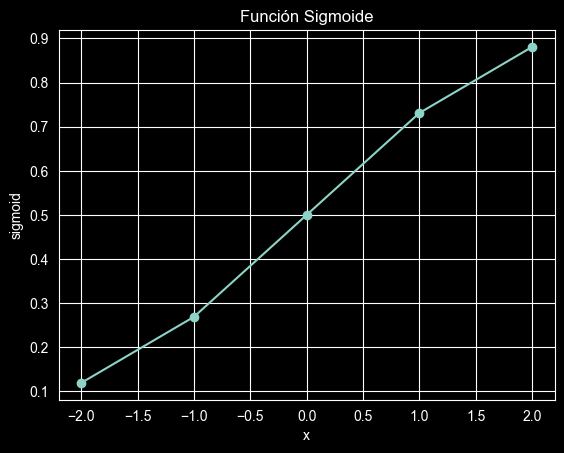

In [20]:
import matplotlib.pyplot as plt
x=np.array([-2,-1,0,1,2])
#x=np.linspace(-6,6,100)
sigmoid=1/ (1+np.exp(-x))
plt.plot(x,sigmoid,marker= "o")
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.title("Función Sigmoide")
plt.grid(True)
plt.show()

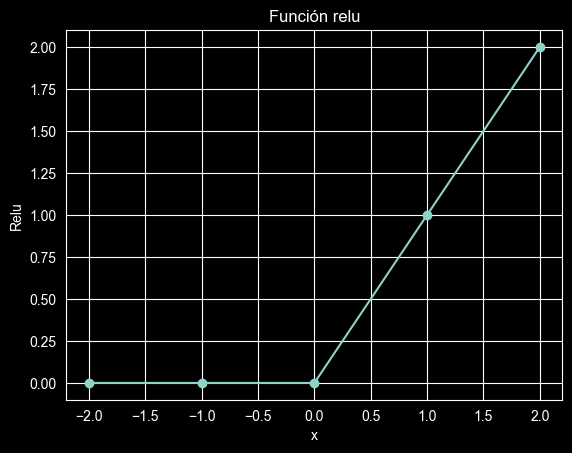

In [19]:
import matplotlib.pyplot as plt
x=np.array([-2,-1,0,1,2])
#x=np.linspace(-6,6,100)
relu=np.maximum(0,x)
plt.plot(x,relu,marker= "o")
plt.xlabel("x")
plt.ylabel("Relu")
plt.title("Función relu")
plt.grid(True)
plt.show()

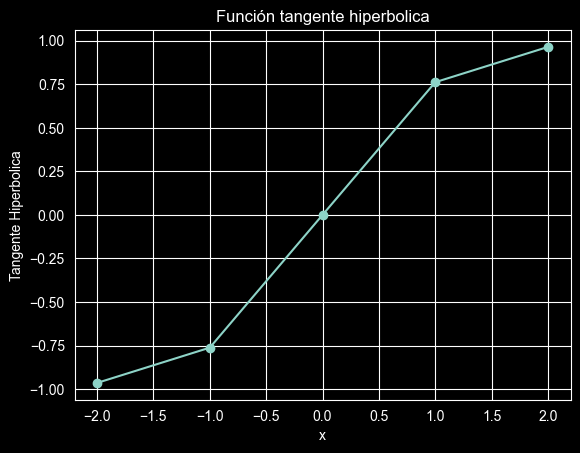

In [18]:
import matplotlib.pyplot as plt
x=np.array([-2,-1,0,1,2])
#x=np.linspace(-6,6,100)
tanh=np.tanh(x)
plt.plot(x,tanh,marker= "o")
plt.xlabel("x")
plt.ylabel("Tangente Hiperbolica")
plt.title("Función tangente hiperbolica")
plt.grid(True)
plt.show()

## Propagación hacia adelante

In [2]:
# Normalización y estandarización
# Valor normalizado = (x-min / max-min)
# Valor estandarizado = x - media_de_valores / desviación_estandar
#x=[0.2,0.5,0.7,1]
#x=[-2, -1,0,1,2]
x=[33,1000] # rango = 5000 - 50000
x1=[80,2] # rango = 20 - 65
val_min= np.array([20,5000])
val_max= np.array([65,50000])
x_norm=(x-val_min)/(val_max-val_min)
print(x_norm)

[ 0.28888889 -0.08888889]


In [13]:
xn= np.array([[20,6000],[35,40000],[29,12000],[50,35000]])
#Normalización minimo máximo
xn_min= xn.min(axis=0)#Toma el valor mínimo de cada columna
xn_max= xn.max(axis=0)#Toma el valor máximo de cada columna
#print(xn_min)
#print(xn_max)

#Normalización
xn_norm=(xn-xn_min)/(xn_max-xn_min)
print("Matriz normalizada\n",xn_norm)
#Se adapta a datos reales

val_min= np.array([20,5000])
val_max= np.array([65,50000])
xn_norm1=(xn-val_min)/(val_max-val_min)
print("\nMatriz normalizada con rangos establecidos\n",xn_norm1)
#Rango de datos establecidos, siempre será igual


Matriz normalizada
 [[0.         0.        ]
 [0.5        1.        ]
 [0.3        0.17647059]
 [1.         0.85294118]]

Matriz normalizada con rangos establecidos
 [[0.         0.02222222]
 [0.33333333 0.77777778]
 [0.2        0.15555556]
 [0.66666667 0.66666667]]


In [8]:
# Ejemplo de una sola neurona
#Entradas: 2 caracteristica [Edad, Ingresos]
#Pesos: 2 (1 por cada entrada)
#Sesgos: 1, esto es por numero de neuronas
# Función de activación sigmoide

x_n=np.array([ 0.28888889, -0.08888889]) # Entradas normalizadas
print("Entradas:",x_n)
w=np.random.rand(2) #Crea 2 números aleatorios
b=np.random.rand(1) #Sesgo aleatorio

#Propagación hacia adelante
v=np.dot(x_n,w)+b #Regresión lineal
s= 1/(1+np.exp(-v))

print("Pesos:",w)
print("Sesgo",b)
print("Valor:",v)
print("Activación: ",s)



Entradas: [ 0.28888889 -0.08888889]
Pesos: [0.36231749 0.47816552]
Sesgo [0.09108847]
Valor: [0.15325437]
Activación:  [0.53823878]


In [12]:
# Ejemplo con 4 neuronas

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_n2=np.array([ 0.28888889, -0.08888889, 0.56234553]) # Nuevas entradas normalizadas
w2=np.random.rand(4,3) #Crea 2 números aleatorios
b2=np.random.rand(4) #Sesgo aleatorio

v2=np.dot(w2,x_n2)+b2 #Regresión lineal
s2= sigmoid(v2)

print("Pesos:\n",w2)
print("Sesgo",b2)
print("Valor:",v2)
print("Activación: ",s2)

Pesos:
 [[0.27373215 0.58881728 0.39966816]
 [0.03482445 0.41800764 0.52320265]
 [0.83247023 0.55771724 0.82651556]
 [0.1674203  0.55225629 0.38062412]]
Sesgo [0.99646349 0.34048837 0.41009037 0.52387085]
Valor: [1.24795395 0.6076132  1.06579424 0.73718954]
Activación:  [0.77694548 0.64739615 0.74379627 0.67638098]


### Función de perdida

In [35]:
# Predice si le van a dar un crédito de un auto o no, valor: 400,000
# Pago mensual de 8000
def sigmoid(x):
    return 1/(1+np.exp(-x))
def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

x=np.array([ 0.28888889, -0.08888889]) # Entradas normalizadas
print("Entradas:",x)
w=np.random.rand(2) #Crea 2 números aleatorios
b=np.random.rand(1) #Sesgo aleatorio

#Propagación hacia adelante
z=np.dot(w,x)+b #Regresión lineal
a= sigmoid(z)

# Valor esperado o etiqueta real
y_verdadero=1

# Cálculo de perdida -- Entropía cruzada
loss = loss(y_verdadero,a)


print("Pesos:",w)
print("Sesgo",b)
print("Valor:",z)
print("Activación: ",a)
print("Loss:",loss)


Entradas: [ 0.28888889 -0.08888889]
Pesos: [0.85161713 0.46731996]
Sesgo [0.42081569]
Valor: [0.62529886]
Activación:  [0.65142273]
Loss: [0.42859648]


### Josue Santana Robledo Corona

In [38]:
# valores de sensores normalizados
#Numero de neuronas=numero de segos= 5
def sigmoid(x):
    return 1/(1+np.exp(-x))
def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

xn= np.array([[80, 2],[15, 2],[90, 10],[90, 24],[110, 15],[80, 9],[75, 0.5],[92, 15]])

entradas = 2
neuronas = 5

xn_min= xn.min(axis=0)#Toma el valor mínimo de cada columna
xn_max= xn.max(axis=0)#Toma el valor máximo de cada columna

#Normalización
xn_norm=(xn-xn_min)/(xn_max-xn_min)
# print("Matriz normalizada\n",xn_norm)


w=np.random.rand(entradas,neuronas)
b=np.random.rand(neuronas) #Sesgo aleatorio

#Propagación hacia adelante
z=np.dot(xn_norm,w)+b #Regresión lineal
a= sigmoid(z)

print("Pesos: ",w)
print("Sesgo: ",b)
print("Valor: \n",z)
print("Activación: \n",a)


Pesos:  [[0.01749001 0.9337978  0.79499911 0.66142571 0.15756936]
 [0.57940384 0.91256265 0.08157481 0.75500651 0.27574242]]
Sesgo:  [0.22815533 0.90341712 0.96600907 0.2384742  0.37610266]
Valor: 
 [[0.27710541 1.60058009 1.51516273 0.73922053 0.50151385]
 [0.26513856 0.9616658  0.97121597 0.2866661  0.39370324]
 [0.47619032 2.00953422 1.626617   1.06586778 0.61196986]
 [0.82136708 2.55318856 1.67521475 1.51565889 0.77624194]
 [0.60314984 2.40028549 1.81134157 1.36575498 0.70381096]
 [0.44969379 1.87240726 1.53946161 0.96411609 0.58364989]
 [0.23920166 1.49318415 1.46811377 0.65621675 0.47562015]
 [0.59983595 2.22335538 1.66071016 1.24043222 0.67395571]]
Activación: 
 [[0.56883643 0.83209944 0.81982506 0.67682538 0.62281503]
 [0.56589904 0.7234552  0.7253618  0.57117974 0.59717386]
 [0.61684787 0.88179448 0.83570567 0.74381029 0.64839002]
 [0.69452646 0.92778743 0.84226985 0.81989834 0.6848696 ]
 [0.64637661 0.91684907 0.85952394 0.79669344 0.66903217]
 [0.61056643 0.86673657 0.823386

### BackPropagation
#### Josue Santana Robledo Corona

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

x=np.array([ 0.28888889, -0.08888889]) # Entradas normalizadas
w=np.array([0.01749001, 0.9337978])
b=np.array([0.22815533])
z=np.dot(w,x)+b

#Propagación hacia adelante
z=np.dot(w,x)+b #Regresión lineal
a= sigmoid(z)

# Valor esperado o etiqueta real
y_verdadero=1

# Cálculo de perdida -- Entropía cruzada
loss = loss(y_verdadero,a)

#BackPropagation
#Derivadas

dL_da= (y_verdadero/ (a + 1e-8)) + ((1-y_verdadero)/(1-a+1e-8))
da_dz=a*(1-a)
dL_dz=dL_da*da_dz

#Gradientes
dL_dw=dL_dz * x
dL_db=dL_dz * 1

print("\nDerivadas parciales: ")
print("dL_da: ",dL_da)
print("da_dz: ",da_dz)
print("dL_dz: ",dL_dz)

print("\nGradiente: ")
print("dL_dw: ",dL_dw)
print("dL_db: ",dL_db)





Derivadas parciales: 
dL_da:  [1.86053259]
da_dz:  [0.24859521]
dL_dz:  [0.46251949]

Gradiente: 
dL_dw:  [ 0.13361674 -0.04111284]
dL_db:  [0.46251949]


### BackPropagation y optimización

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

#Tasa de aprendizaje
alpha=0.1

x=np.array([ 0.28888889, 0.011111111]) # Entradas normalizadas
w=np.array([0.38507866, 0.35278766])
b=np.array([0.98639454])
z=np.dot(w,x)+b

#Propagación hacia adelante
z=np.dot(w,x)+b #Regresión lineal
a= sigmoid(z)

# Valor esperado o etiqueta real
y_verdadero=0

# Cálculo de perdida -- Entropía cruzada
loss = loss(y_verdadero,a)

#BackPropagation
#Derivadas

dL_dz = a - y_verdadero
da_dz = a*(1-a)

#Gradientes
dL_dw=dL_dz * x
dL_db=dL_dz * 1

#Descenso del gradiente -- Actualizar parametros
w= w-alpha*dL_dw
b= b-alpha*dL_db


print("\nDerivadas parciales: ")
print("da_dz: ",da_dz)
print("dL_dz: ",dL_dz)

print("\nGradiente: ")
print("dL_dw: ",dL_dw)
print("dL_db: ",dL_db)

print("\nActualización de parametros: ")
print("w: ",w)
print("b: ",b)



Derivadas parciales: 
da_dz:  [0.18722361]
dL_dz:  [0.75055217]

Gradiente: 
dL_dw:  [0.21682618 0.00833947]
dL_db:  [0.75055217]

Actualización de parametros: 
w:  [0.36339604 0.35195371]
b:  [0.91133932]


## Entrenamiento

Iteración:  0
Valor de capa:  [1.10155935]
Activación:  [0.75055217]
Perdida:  [1.38850543]
Pesos:  [0.36339604 0.35195371]
Sesgo:  [0.91133932]

Iteración:  20
Valor de capa:  [-0.20196352]
Activación:  [0.44968005]
Perdida:  [0.59725542]
Pesos:  [0.02456101 0.3389216 ]
Sesgo:  [-0.26155116]

Iteración:  40
Valor de capa:  [-0.97327766]
Activación:  [0.27422768]
Perdida:  [0.3205189]
Pesos:  [-0.17600727  0.33120743]
Sesgo:  [-0.95582597]

Iteración:  60
Valor de capa:  [-1.46786434]
Activación:  [0.18726744]
Perdida:  [0.20735317]
Pesos:  [-0.30535481  0.32623253]
Sesgo:  [-1.40356746]

Iteración:  80
Valor de capa:  [-1.81988411]
Activación:  [0.13944778]
Perdida:  [0.15018097]
Pesos:  [-0.3978239   0.32267602]
Sesgo:  [-1.72365278]

Iteración:  99
Valor de capa:  [-2.07751186]
Activación:  [0.11130184]
Perdida:  [0.11799762]
Pesos:  [-0.46569588  0.32006556]
Sesgo:  [-1.95859423]



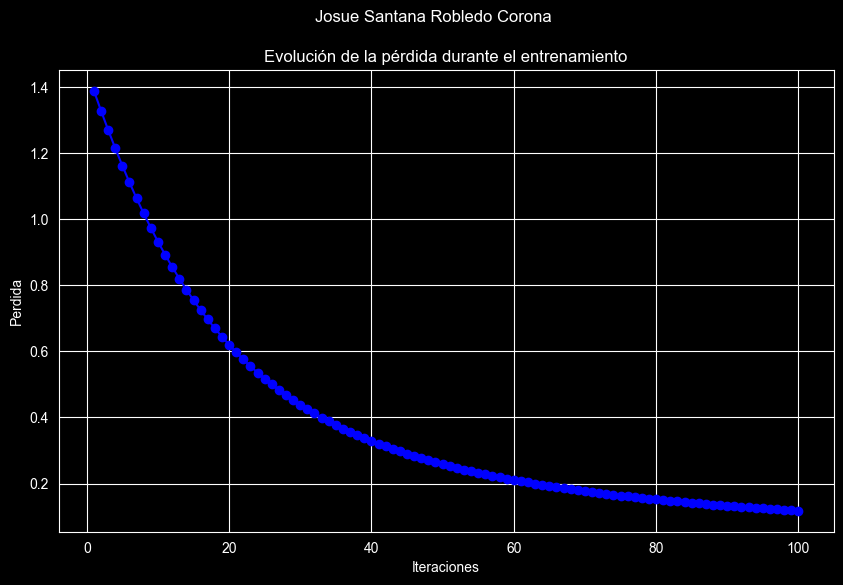

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

#Tasa de aprendizaje
alpha=0.1
iter=100

#Variable para guardar los valores de las pérdidas
loss_values=[]

# Valor esperado o etiqueta real
y_verdadero=0
# Inicialización de pesos y sesgos
x=np.array([ 0.28888889, 0.011111111]) # Entradas normalizadas
w=np.array([0.38507866, 0.35278766])
b=np.array([0.98639454])
z=np.dot(w,x)+b

#Entrenamiento
for i in range(iter):
    #Propagación hacia adelante
    z=np.dot(w,x)+b #Regresión lineal
    a= sigmoid(z)

    # Cálculo de perdida -- Entropía cruzada
    loss_val = loss(y_verdadero,a)
    loss_values.append(loss_val)
    #BackPropagation
    #Derivadas
    dL_dz = a - y_verdadero
    da_dz = a*(1-a)

    #Gradientes
    dL_dw=dL_dz * x
    dL_db=dL_dz * 1

    #Descenso del gradiente -- Actualizar parámetros
    w= w-alpha*dL_dw
    b= b-alpha*dL_db



    if i%20==0 or i==iter-1:
        print("Iteración: ",i)
        print("Valor de capa: ",z)
        print("Activación: ",a)
        print("Perdida: ",loss_val)
        print("Pesos: ",w)
        print("Sesgo: ",b)
        print()
#Graficar la pérdida
plt.figure(figsize=(10,6))
plt.plot(range(1,iter+1),loss_values,marker='o',linestyle='-',color='blue')
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.suptitle('Josue Santana Robledo Corona')
plt.grid(True)
plt.show()



# Redes Neuronales complejas

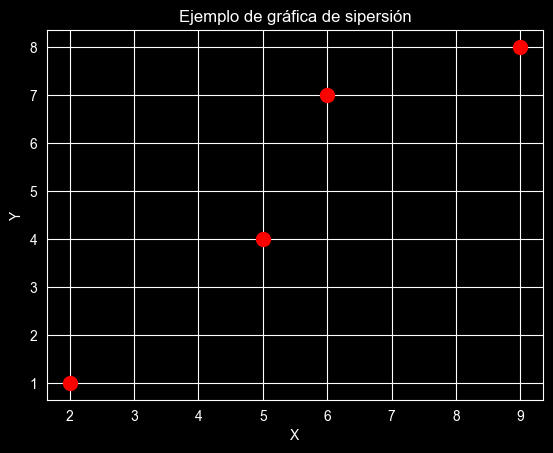

In [3]:
x=[2,5,6,9]
y=[1,4,7,8]

plt.scatter(x,y,color="red",marker="o",s=100)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ejemplo de gráfica de sipersión")
plt.show()

#### Dataset Lineal

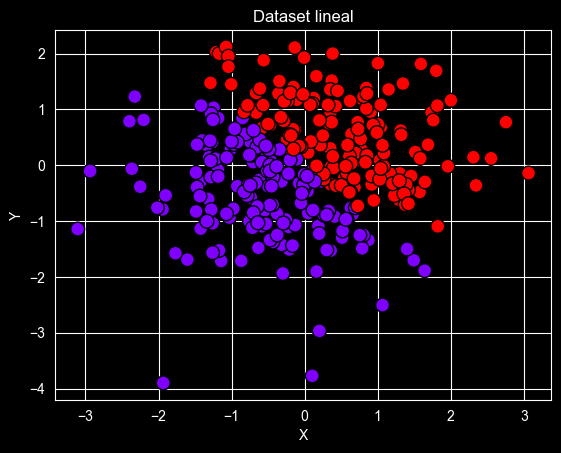

In [6]:
def dataset_lineal(n_ejemplos=500,seed=0):
    np.random.seed(seed)
    x=np.random.normal(0,1,(2,n_ejemplos))
    nums=np.random.default_rng(seed)
    x=nums.normal(0,1,(2,n_ejemplos))
    y=(x[0,:]+x[1,:] >0).astype(int).reshape(1,-1)
    return x,y


x,y=dataset_lineal(n_ejemplos=300,seed=0)
plt.scatter(x[0,:],x[1,:],c=y.ravel(),marker="o",s=100,cmap=plt.cm.rainbow,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset lineal")
plt.show()

In [17]:
def dataset_circulos(n_ejemplos=500,seed=0,radio_int=2,radio_ext=4,ruido=0.05):
    nums=np.random.default_rng(seed)

    #Ejemplos para cada circulo
    c_interior=n_ejemplos//2
    c_exterior=n_ejemplos-c_interior

    #Ángulos uniformes
    angulos_int=nums.uniform(0,2*np.pi,c_interior)
    angulos_ext=nums.uniform(0,2*np.pi,c_exterior)

    #Radio con ruido Gausiano
    radios_int=radio_int + nums.normal(0,ruido,c_interior)
    radios_ext=radio_ext + nums.normal(0,ruido,c_exterior)

    #Coordenada xy de cada circulo
    x_int=radios_int*np.cos(angulos_int)
    y_int=radios_int*np.sin(angulos_int)

    x_ext=radios_ext*np.cos(angulos_ext)
    y_ext=radios_ext*np.sin(angulos_ext)
    X=np.hstack([np.vstack([x_int,y_int]),np.vstack([x_ext,y_ext])])

    #Etiquetas: 0 para interior 1 para exterior
    y=np.vstack([np.zeros((1,c_interior)),np.ones((1,c_exterior))]).reshape(1,-1)
    return X,y

In [14]:
x_int=[0.5,-0.2]
y_int=[0.8,-0.3]
x_ext=[-0.5,0.2]
y_ext=[-0.8,0.3]
X=np.hstack([np.vstack([x_int,y_int]),np.vstack([x_ext,y_ext])])
print(X)

[[ 0.5 -0.2 -0.5  0.2]
 [ 0.8 -0.3 -0.8  0.3]]


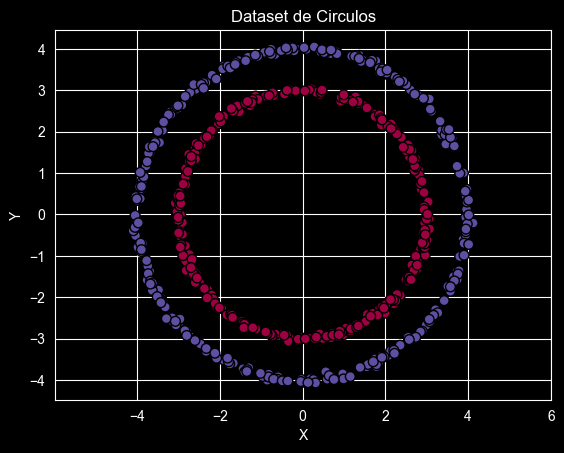

In [18]:
X,y=dataset_circulos(n_ejemplos=600,seed=0,radio_int=3,radio_ext=4,ruido=0.05)
plt.scatter(X[0,:],X[1,:],c=y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Circulos")
plt.axis("equal")
plt.show()

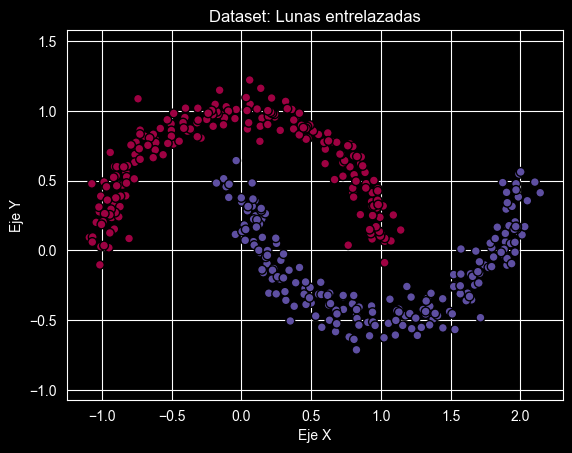

In [2]:
def ds_lunas(n=400, ruido=0.08, seed=1):
    """
    Genera dos medias lunas entrelazadas
    Parámetros:
      n     : total de puntos (se divide en 2 lunas)
      ruido : desviación estándar del ruido gaussiano
      seed  : semilla para reproducibilidad
      (formato X:(2,m), Y:(1,m)).
    Retorna:
      X : matriz (2, m) con coordenadas de puntos
      Y : vector (1, m) con etiquetas (0 y 1)
    """
    nums = np.random.default_rng(seed)     # Generador independiente

    n2 = n // 2                           # puntos por luna

    #Luna 1 superior
    ang1 = np.linspace(0, np.pi, n2)      # ángulos de 0 a π
    X1 = np.c_[np.cos(ang1),              # x = cos(θ)
               np.sin(ang1)]              # y = sin(θ)
    X1 = X1 + ruido * nums.standard_normal((n2, 2))  # ruido gaussiano
    Y1 = np.zeros((n2, 1), dtype=int)     # etiquetas 0

    #Luna 2 inferior
    ang2 = np.linspace(0, np.pi, n2)      # mismos ángulos
    base = np.c_[1 - np.cos(ang2),        # desplazamiento horizontal
                 1 - np.sin(ang2) - 0.5]  # desplazamiento vertical
    X2 = base + ruido * nums.standard_normal((n2, 2))
    Y2 = np.ones((n2, 1), dtype=int)      # etiquetas 1

    #Unir
    X = np.vstack([X1, X2]).T             # Transponer → (2, m)
    Y = np.vstack([Y1, Y2]).T             # Transponer → (1, m)

    return X, Y

#Llamar la función
X_luna, y_luna = ds_lunas()

#Graficar
plt.scatter(X_luna[0, :], X_luna[1, :], c=y_luna.ravel(), cmap=plt.cm.Spectral, edgecolors='k', s=40)
plt.title("Dataset: Lunas entrelazadas")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.axis('equal')
plt.show()

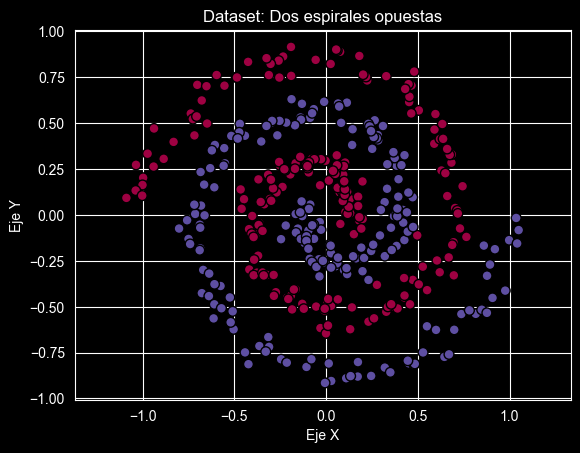

In [4]:
def ds_espiral(n=400, vueltas=3, ruido=0.05, seed=1):
    """Dos espirales opuestas.
    Parámetros:
      n       : total de puntos (se divide en 2 espirales de n/2 c/u)
      vueltas : cuántas medias-vueltas (en múltiplos de π) recorre cada espiral
      ruido   : desviación estándar del ruido gaussiano agregado a (x, y)
      seed    : semilla para reproducibilidad
    Retorna:
      X : matriz de puntos (m, 2)
      Y : etiquetas 0/1 (m, 1)
    """

    np.random.seed(seed)               # Fija la semilla para reproducibilidad del muestreo

    n2 = n // 2                        # Mitad de los puntos para cada espiral

    # Espiral 1
    ang1 = np.linspace(0, vueltas*np.pi, n2)   # Ángulos desde 0 hasta 'vueltas·π' (crece de forma lineal)
    r1   = np.linspace(0.1, 1.0, n2)           # Radio que crece de 0.1 a 1.0 (espiral alejándose del centro)

    # Coordenadas cartesianas de la espiral 1 con ruido gaussiano agregado
    X1   = np.c_[r1*np.cos(ang1),              # x = r * cos(θ)
                 r1*np.sin(ang1)]              # y = r * sin(θ)
    X1   = X1 + ruido*np.random.randn(n2, 2)   # Perturbación gaussiana N(0, ruido^2) en cada eje
    Y1   = np.zeros((n2, 1))                   # Etiquetas 0 para la espiral 1

    # Espiral 2 (opuesta a la 1)
    ang2 = np.linspace(0, vueltas*np.pi, n2)   # Mismos ángulos base que la espiral 1
    r2   = np.linspace(0.1, 1.0, n2)           # Mismo radio creciente

    # Desfase angular de π (180°) para ponerla "enfrente"/opuesta
    X2   = np.c_[r2*np.cos(ang2 + np.pi),      # x = r * cos(θ + π) = -r * cos(θ)
                 r2*np.sin(ang2 + np.pi)]      # y = r * sin(θ + π) = -r * sin(θ)
    X2   = X2 + ruido*np.random.randn(n2, 2)   # Ruido gaussiano en la segunda espiral
    Y2   = np.ones((n2, 1))                    # Etiquetas 1 para la espiral 2

    # Unión de ambas espirales
    X = np.vstack([X1, X2])                    # Apila puntos → matriz (m, 2)
    Y = np.vstack([Y1, Y2])                    # Apila etiquetas → vector columna (m, 1)

    return X, Y                                 # Devuelve datos y etiquetas


X_spi, y_spi = ds_espiral()   # Genera espiral doble

# Grafica
plt.scatter(X_spi[:, 0], X_spi[:, 1],      # Coordenadas (X, Y)
            c=y_spi.ravel(), cmap=plt.cm.Spectral,   # Colorea según clase
            edgecolors='k', s=50)                    # Borde negro, tamaño puntos
plt.title("Dataset: Dos espirales opuestas")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.axis('equal')                                               # Escalas iguales en X e Y
plt.show()

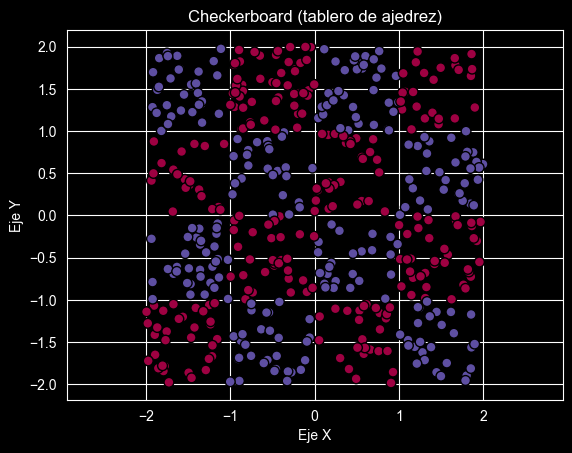

In [5]:
def dataset_checkerboard(n_ejemplos=500, rango=2.0, seed=1):
    """
    Genera un dataset tipo tablero de ajedrez (CHECKBOARD)
    - Clases alternadas por cuadros en el plano (patrón par/impar)
    Formato:
      X: (2, m), Y: (1, m)
    """
    nums = np.random.default_rng(seed)    # Generador aleatorio reproducible

    # Muestra coordenadas uniformes en el cuadrado [-rango, rango] × [-rango, rango]
    x = nums.uniform(-rango, rango, n_ejemplos)  # Vector de x de tamaño m
    y = nums.uniform(-rango, rango, n_ejemplos)  # Vector de y de tamaño m

    # Asigna clase alternando por “cuadros”:
    # Tomamos floor(x) y floor(y), sumamos y miramos si es par (0) o impar (1)
    etiquetas = ((np.floor(x) + np.floor(y)) % 2).astype(int)

    # Ajuste de formato de salida
    X = np.vstack([x, y])                # Datos como matriz 2×m (fila 0 = x, fila 1 = y)
    Y = etiquetas.reshape(1, -1)         # Etiquetas como vector fila 1×m

    return X, Y                          # Devuelve datos y etiquetas

# Grafica
X_chk, y_chk = dataset_checkerboard()           # Genera tablero
plt.scatter(X_chk[0, :], X_chk[1, :],                                           # Grafica puntos
            c=y_chk.ravel(), cmap=plt.cm.Spectral, edgecolors='k', s=50)         # Colorea por clase
plt.title("Checkerboard (tablero de ajedrez)")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.axis('equal')                                                                # Escala uniforme
plt.show()

X (600, 2) Y (600,)
X (2, 600) Y (1, 600)


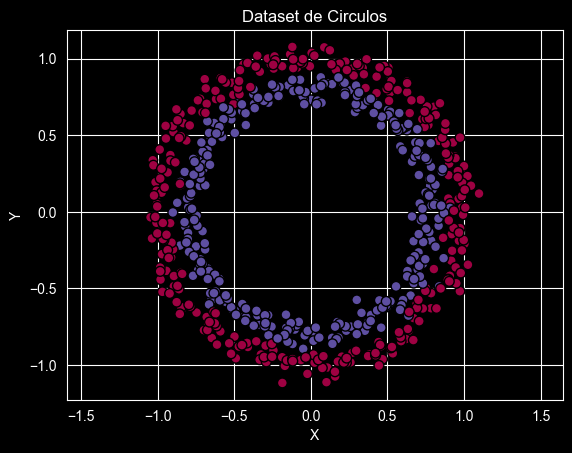

In [9]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=600,shuffle=True,factor=0.8,noise=0.05,random_state=1)
print("X",X.shape,"Y",y.shape)
X=X.T
y=y.reshape(1,-1)
print("X",X.shape,"Y",y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Circulos")
plt.axis("equal")
plt.show()


X (600, 2) Y (600,)
X (2, 600) Y (1, 600)


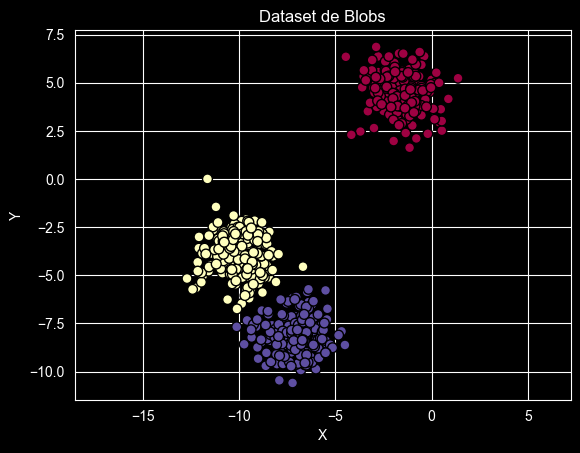

In [16]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=600,shuffle=True,random_state=1)
print("X",X.shape,"Y",y.shape)
X=X.T
y=y.reshape(1,-1)
print("X",X.shape,"Y",y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Blobs")
plt.axis("equal")
plt.show()

X (600, 2) Y (600,)
X (2, 600) Y (1, 600)


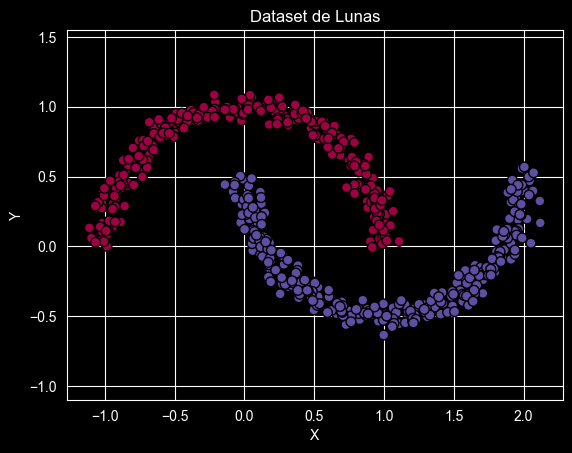

Iteración: 0 Pérdida: 0.6879404571083195
Iteración: 100 Pérdida: 0.3837898067380407
Iteración: 200 Pérdida: 0.3299273149657624
Iteración: 300 Pérdida: 0.3051972436388586
Iteración: 400 Pérdida: 0.2900169823481727
Iteración: 500 Pérdida: 0.27953150557448014
Iteración: 600 Pérdida: 0.2718527774001117
Iteración: 700 Pérdida: 0.2660297084992108
Iteración: 800 Pérdida: 0.2615049059210592
Iteración: 900 Pérdida: 0.2579217463919241


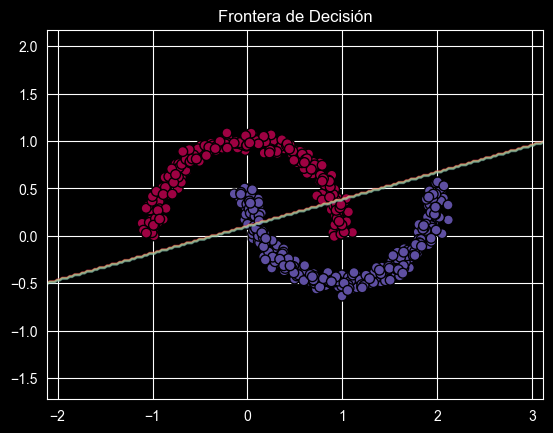

In [7]:
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=600,shuffle=True,noise=0.05,random_state=1)
print("X",X.shape,"Y",Y.shape)
X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=Y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Lunas")
plt.axis("equal")
plt.show()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def cross_entropy(Y,A):
    return -(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8))

def frontera_desicion(X,Y,w,b, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))
    z = np.dot(w.T, malla) + b
    a = sigmoid(z)

    Z = (a > umbral).astype(int).reshape(xx.shape)

    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión")
    plt.show()


np.random.seed(1)
w = np.random.randn(X.shape[0],1) * 0.01
b = np.zeros((1, 1))

#Hiperparametros
alpha = 0.1
iter = 1000

for i in range(iter):
    Z = np.dot(w.T, X) + b
    A=sigmoid(Z)
    loss=np.mean(cross_entropy(Y,A))

    #BackPropagation
    dZ= A-Y
    dW=np.dot(X,dZ.T)/X.shape[1]
    db=np.sum(dZ)/X.shape[1]

    #Atualización
    w=w-alpha*dW
    b=b-alpha*db

    if i%100==0:
        print(f"Iteración: {i} Pérdida: {loss}")

frontera_desicion(X,Y,w,b,pasos=200,margen=1.0,umbral=0.5)

## Clasificación Planar de datos

### Neurona Superficial

X (600, 2) Y (600,)
X (2, 600) Y (1, 600)


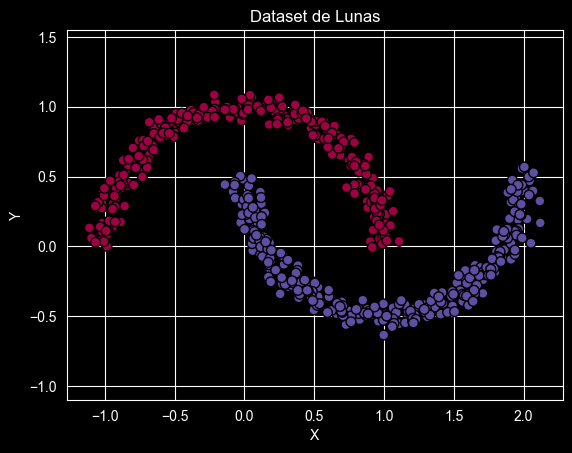

Iteración: 0   Perdida: 0.6951563460438319
Iteración: 100   Perdida: 0.24571358389543552
Iteración: 200   Perdida: 0.242849776484824
Iteración: 300   Perdida: 0.24229610504078636
Iteración: 400   Perdida: 0.2418816073419607
Iteración: 500   Perdida: 0.2415581292317978
Iteración: 600   Perdida: 0.24130078901213362
Iteración: 700   Perdida: 0.2410922698335717
Iteración: 800   Perdida: 0.24092027530123383
Iteración: 900   Perdida: 0.24077597594821706
Iteración: 1000   Perdida: 0.24065295373688106
Iteración: 1100   Perdida: 0.24054647953339403
Iteración: 1200   Perdida: 0.2404530193486857
Iteración: 1300   Perdida: 0.24036989474569087
Iteración: 1400   Perdida: 0.2402950462839333
Iteración: 1500   Perdida: 0.2402268662587178
Iteración: 1600   Perdida: 0.24016407865757444
Iteración: 1700   Perdida: 0.24010565172747447
Iteración: 1800   Perdida: 0.24005073329374355
Iteración: 1900   Perdida: 0.23999860202186094
Iteración: 2000   Perdida: 0.23994862980030726
Iteración: 2100   Perdida: 0.23990

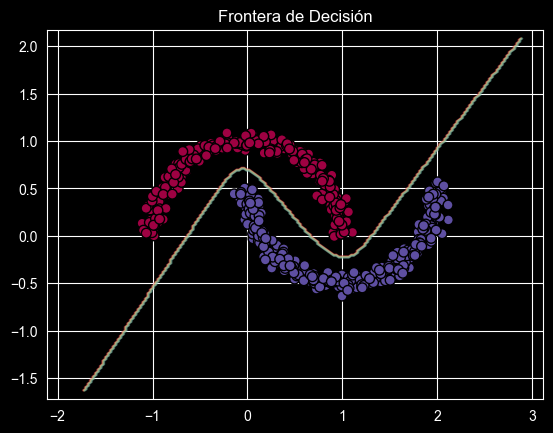

In [6]:
from sklearn.datasets import make_moons

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

def frontera_desicion(X,Y,modelo, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))

    Z = modelo(malla)
    Z=Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión")
    plt.show()


def neurona_superficial(malla):
    Z1=np.dot(w1,malla)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=np.tanh(Z2)
    return (A2 > 0.5).astype(int)


X,Y=make_moons(n_samples=600,shuffle=True,noise=0.05,random_state=1)
print("X",X.shape,"Y",Y.shape)
X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=Y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Lunas")
plt.axis("equal")
plt.show()

np.random.seed(1)
n_h=8 #Número de Neuronas en nuestra capa oculta

w1=np.random.rand(n_h,X.shape[0])*0.1
b1=np.zeros((n_h, 1))
w2=np.random.rand(1,n_h)*0.1
b2=np.zeros((1, 1))
#solo un sesgo para nuestra salida

#Tasa de aprendizaje
alpha=0.5
iter=10000

for i in range(iter):

    #Forward Propagation
    Z1=np.dot(w1,X)+b1
    A1= np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2= sigmoid(Z2)
    loss=np.mean(cross_entropy(Y,A2))

    #BackPropagation
    dZ2= A2- Y
    dW2= (1/X.shape[1])*np.dot(dZ2,A1.T)
    db2= (1/X.shape[1])*np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(w2.T,dZ2)
    dZ1=(1-np.power(A1,2))*dA1
    dW1=(1/X.shape[1])*np.dot(dZ1,X.T)
    db1= (1/X.shape[1])*np.sum(dZ1,axis=1,keepdims=True)

    ##Actualización de Parámetros del gradiente descendente
    w1-=alpha*dW1
    b1-=alpha*db1
    w2-=alpha*dW2
    b2-=alpha*db2

    if i % 100==0:
        print(f"Iteración: {i}   Perdida: {loss}")

frontera_desicion(X,Y,neurona_superficial,pasos=200,margen=1)


X (600, 2) Y (600,)
X (2, 600) Y (1, 600)


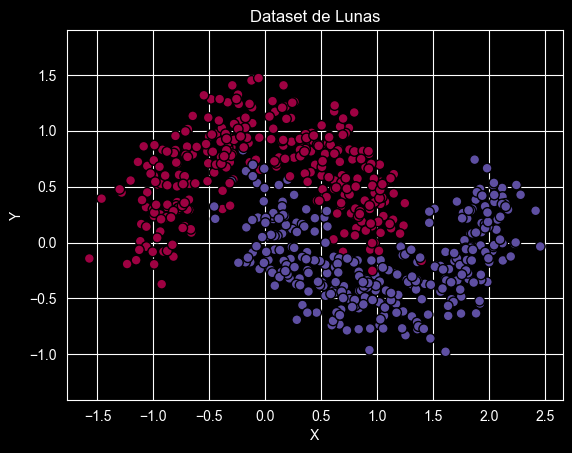

Iteración: 0   Perdida: 0.6936381865835929
Iteración: 100   Perdida: 0.29364538150833996
Iteración: 200   Perdida: 0.2794022604706804
Iteración: 300   Perdida: 0.2788971055204784
Iteración: 400   Perdida: 0.2786582706824555
Iteración: 500   Perdida: 0.2784528041604086
Iteración: 600   Perdida: 0.2782704761945749
Iteración: 700   Perdida: 0.27810681319377606
Iteración: 800   Perdida: 0.27795830191246085
Iteración: 900   Perdida: 0.277822076531681
Iteración: 1000   Perdida: 0.27769577560491027
Iteración: 1100   Perdida: 0.27757744431978065
Iteración: 1200   Perdida: 0.27746546375203734
Iteración: 1300   Perdida: 0.2773584982792787
Iteración: 1400   Perdida: 0.277255455333791
Iteración: 1500   Perdida: 0.2771554531665823
Iteración: 1600   Perdida: 0.27705779338567654
Iteración: 1700   Perdida: 0.2769619360544603
Iteración: 1800   Perdida: 0.2768674761369298
Iteración: 1900   Perdida: 0.27677412096597315
Iteración: 2000   Perdida: 0.2766816690538444
Iteración: 2100   Perdida: 0.27658999086

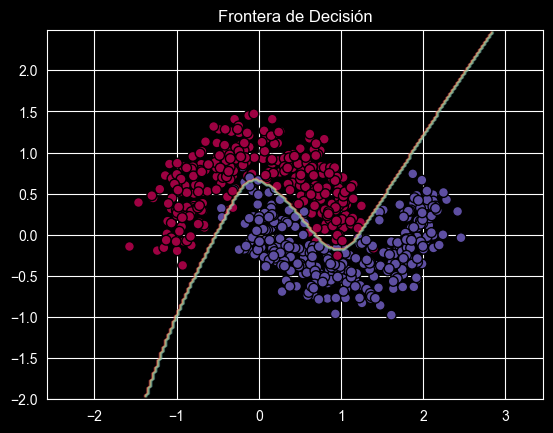

Presición : 97.66666666666667%


In [2]:
from sklearn.datasets import make_moons

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

def frontera_desicion(X,Y,modelo, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))

    Z = modelo(malla)
    Z=Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión")
    plt.show()


def neurona_superficial(malla):
    Z1=np.dot(w1,malla)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=np.tanh(Z2)
    return (A2 > 0.5).astype(int)


X,Y=make_moons(n_samples=600,shuffle=True,noise=0.2,random_state=10)
print("X",X.shape,"Y",Y.shape)
X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=Y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Lunas")
plt.axis("equal")
plt.show()

np.random.seed(1)
n_h=4 #Número de Neuronas en nuestra capa oculta

w1=np.random.rand(n_h,X.shape[0])*0.1
b1=np.zeros((n_h, 1))
w2=np.random.rand(1,n_h)*0.1
b2=np.zeros((1, 1))
#solo un sesgo para nuestra salida

#Tasa de aprendizaje
alpha=0.3
iter=10000

for i in range(iter):

    #Forward Propagation
    Z1=np.dot(w1,X)+b1
    A1= np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2= sigmoid(Z2)
    loss=np.mean(cross_entropy(Y,A2))

    #BackPropagation
    dZ2= A2- Y
    dW2= (1/X.shape[1])*np.dot(dZ2,A1.T)
    db2= (1/X.shape[1])*np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(w2.T,dZ2)
    dZ1=(1-np.power(A1,2))*dA1
    dW1=(1/X.shape[1])*np.dot(dZ1,X.T)
    db1= (1/X.shape[1])*np.sum(dZ1,axis=1,keepdims=True)

    ##Actualización de Parámetros del gradiente descendente
    w1-=alpha*dW1
    b1-=alpha*db1
    w2-=alpha*dW2
    b2-=alpha*db2

    if i % 100==0:
        print(f"Iteración: {i}   Perdida: {loss}")

frontera_desicion(X,Y,neurona_superficial,pasos=200,margen=1)

#Rendmiiento
pred_train = (A2 > 0.5).astype(int)
accuracy= np.mean(pred_train == Y)
print(f"Presición : {accuracy*100}%")


X (600, 2) Y (600,)
X (2, 600) Y (1, 600)


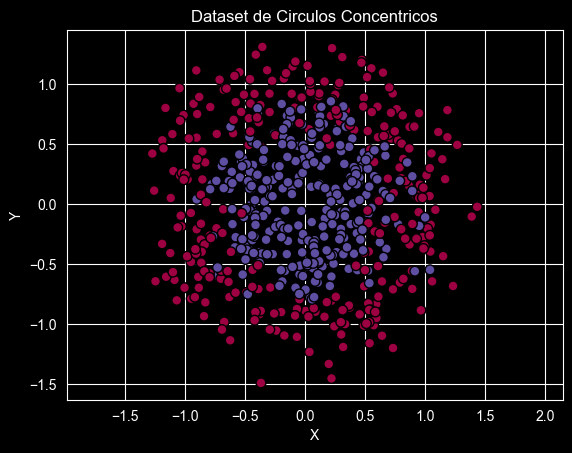

Iteración: 0   Perdida: 0.6931361768212595
Iteración: 100   Perdida: 0.6931350008439745
Iteración: 200   Perdida: 0.6931338428135994
Iteración: 300   Perdida: 0.6931327046787132
Iteración: 400   Perdida: 0.6931315899170666
Iteración: 500   Perdida: 0.6931305022261447
Iteración: 600   Perdida: 0.6931294451596889
Iteración: 700   Perdida: 0.6931284218021558
Iteración: 800   Perdida: 0.6931274344952385
Iteración: 900   Perdida: 0.6931264846273604
Iteración: 1000   Perdida: 0.6931255724918963
Iteración: 1100   Perdida: 0.6931246972136452
Iteración: 1200   Perdida: 0.6931238567368126
Iteración: 1300   Perdida: 0.6931230478623637
Iteración: 1400   Perdida: 0.6931222663186927
Iteración: 1500   Perdida: 0.693121506847434
Iteración: 1600   Perdida: 0.6931207632857433
Iteración: 1700   Perdida: 0.6931200286271082
Iteración: 1800   Perdida: 0.6931192950440282
Iteración: 1900   Perdida: 0.6931185538569925
Iteración: 2000   Perdida: 0.6931177954343122
Iteración: 2100   Perdida: 0.6931170090057255
I

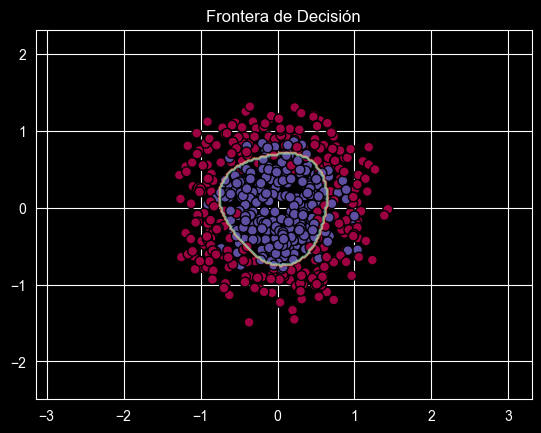

Presición : 87.5%


In [6]:
from sklearn.datasets import make_circles

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

def frontera_desicion(X,Y,modelo, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))

    Z = modelo(malla)
    Z=Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión")
    plt.show()


def neurona_superficial(malla):
    Z1=np.dot(w1,malla)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=np.tanh(Z2)
    return (A2 > 0.5).astype(int)


X,Y=make_circles(n_samples=600,shuffle=True,factor=0.5,noise=0.2,random_state=1)
print("X",X.shape,"Y",Y.shape)
X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=Y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Circulos Concentricos")
plt.axis("equal")
plt.show()

np.random.seed(1)
n_h=4 #Número de Neuronas en nuestra capa oculta

w1=np.random.rand(n_h,X.shape[0])*0.1
b1=np.zeros((n_h, 1))
w2=np.random.rand(1,n_h)*0.1
b2=np.zeros((1, 1))
#solo un sesgo para nuestra salida

#Tasa de aprendizaje
alpha=0.3
iter=10000

for i in range(iter):

    #Forward Propagation
    Z1=np.dot(w1,X)+b1
    A1= np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2= sigmoid(Z2)
    loss=np.mean(cross_entropy(Y,A2))

    #BackPropagation
    dZ2= A2- Y
    dW2= (1/X.shape[1])*np.dot(dZ2,A1.T)
    db2= (1/X.shape[1])*np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(w2.T,dZ2)
    dZ1=(1-np.power(A1,2))*dA1
    dW1=(1/X.shape[1])*np.dot(dZ1,X.T)
    db1= (1/X.shape[1])*np.sum(dZ1,axis=1,keepdims=True)

    ##Actualización de Parámetros del gradiente descendente
    w1-=alpha*dW1
    b1-=alpha*db1
    w2-=alpha*dW2
    b2-=alpha*db2

    if i % 100==0:
        print(f"Iteración: {i}   Perdida: {loss}")

frontera_desicion(X,Y,neurona_superficial,pasos=200,margen=1)

#Rendmiiento
pred_train = (A2 > 0.5).astype(int)
accuracy= np.mean(pred_train == Y)
print(f"Presición : {accuracy*100}%")


X (600, 2) Y (600,)
X (2, 600) Y (1, 600)


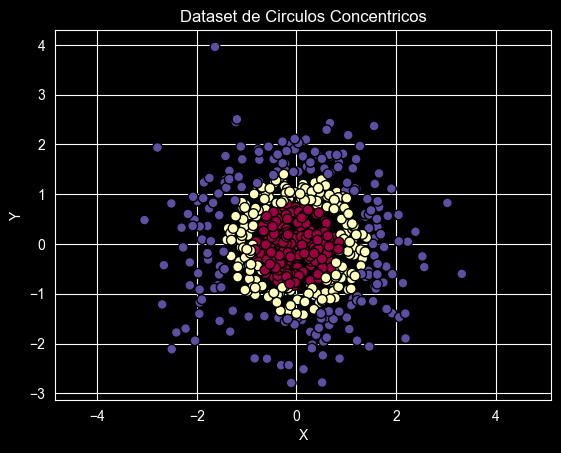

Iteración: 0   Perdida: 0.6926687724860877
Iteración: 100   Perdida: 0.01729687455379171
Iteración: 200   Perdida: 0.004089575764472274
Iteración: 300   Perdida: 0.0005473093026307889
Iteración: 400   Perdida: -0.0013430906588619252
Iteración: 500   Perdida: -0.003164666746422391
Iteración: 600   Perdida: -0.09284876271730426
Iteración: 700   Perdida: -1.3823827500800554
Iteración: 800   Perdida: -1.9316212870350564
Iteración: 900   Perdida: -1.930311741166137
Iteración: 1000   Perdida: -1.930485802262137
Iteración: 1100   Perdida: -1.935280059445413
Iteración: 1200   Perdida: -1.9407437252241062
Iteración: 1300   Perdida: -1.9459891712809416
Iteración: 1400   Perdida: -1.9508725267092124
Iteración: 1500   Perdida: -1.955405011774089
Iteración: 1600   Perdida: -1.9596585386921042
Iteración: 1700   Perdida: -1.9637011042940506
Iteración: 1800   Perdida: -1.9675581945133789
Iteración: 1900   Perdida: -1.9712148246268535
Iteración: 2000   Perdida: -1.9746412337798518
Iteración: 2100   Per

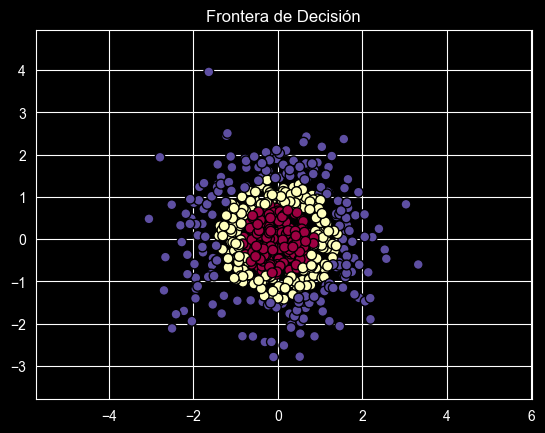

Presición : 33.33333333333333%


In [9]:
from sklearn.datasets import make_gaussian_quantiles

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

def frontera_desicion(X,Y,modelo, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))

    Z = modelo(malla)
    Z=Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión")
    plt.show()


def neurona_superficial(malla):
    Z1=np.dot(w1,malla)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=np.tanh(Z2)
    return (A2 > 0.5).astype(int)


X,Y=make_gaussian_quantiles(mean=None,cov=1.0,n_samples=600,n_features=2,n_classes=3,shuffle=True,random_state=1)
print("X",X.shape,"Y",Y.shape)
X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=Y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Gausianos")
plt.axis("equal")
plt.show()

np.random.seed(1)
n_h=4 #Número de Neuronas en nuestra capa oculta

w1=np.random.rand(n_h,X.shape[0])*0.1
b1=np.zeros((n_h, 1))
w2=np.random.rand(1,n_h)*0.1
b2=np.zeros((1, 1))
#solo un sesgo para nuestra salida

#Tasa de aprendizaje
alpha=0.3
iter=10000

for i in range(iter):

    #Forward Propagation
    Z1=np.dot(w1,X)+b1
    A1= np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2= sigmoid(Z2)
    loss=np.mean(cross_entropy(Y,A2))

    #BackPropagation
    dZ2= A2- Y
    dW2= (1/X.shape[1])*np.dot(dZ2,A1.T)
    db2= (1/X.shape[1])*np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(w2.T,dZ2)
    dZ1=(1-np.power(A1,2))*dA1
    dW1=(1/X.shape[1])*np.dot(dZ1,X.T)
    db1= (1/X.shape[1])*np.sum(dZ1,axis=1,keepdims=True)

    ##Actualización de Parámetros del gradiente descendente
    w1-=alpha*dW1
    b1-=alpha*db1
    w2-=alpha*dW2
    b2-=alpha*db2

    if i % 100==0:
        print(f"Iteración: {i}   Perdida: {loss}")

frontera_desicion(X,Y,neurona_superficial,pasos=200,margen=1)

#Rendmiiento
pred_train = (A2 > 0.5).astype(int)
accuracy= np.mean(pred_train == Y)
print(f"Presición : {accuracy*100}%")


X (600, 2) Y (600, 1)
X (2, 600) Y (1, 600)


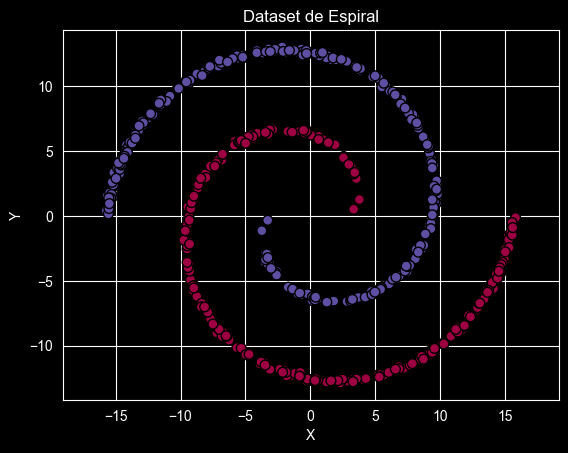

Iteración: 0   Perdida: 0.6806209142015622
Iteración: 100   Perdida: 0.516404662787434
Iteración: 200   Perdida: 0.5224751355485081
Iteración: 300   Perdida: 0.5188019959229497
Iteración: 400   Perdida: 0.5228034402323142
Iteración: 500   Perdida: 0.5166599404141723
Iteración: 600   Perdida: 0.5180206262819985
Iteración: 700   Perdida: 0.5160564567591387
Iteración: 800   Perdida: 0.517064381794938
Iteración: 900   Perdida: 0.5198877362331908
Iteración: 1000   Perdida: 0.5176931595543878
Iteración: 1100   Perdida: 0.5225316881502622
Iteración: 1200   Perdida: 0.508458045929822
Iteración: 1300   Perdida: 0.48146929863990656
Iteración: 1400   Perdida: 0.4679856535453058
Iteración: 1500   Perdida: 0.4554149426844342
Iteración: 1600   Perdida: 0.4361644721331056
Iteración: 1700   Perdida: 0.3805620163161718
Iteración: 1800   Perdida: 0.2999725684474294
Iteración: 1900   Perdida: 0.35880488346002
Iteración: 2000   Perdida: 0.2494609565181869
Iteración: 2100   Perdida: 0.18411315371649845
Ite

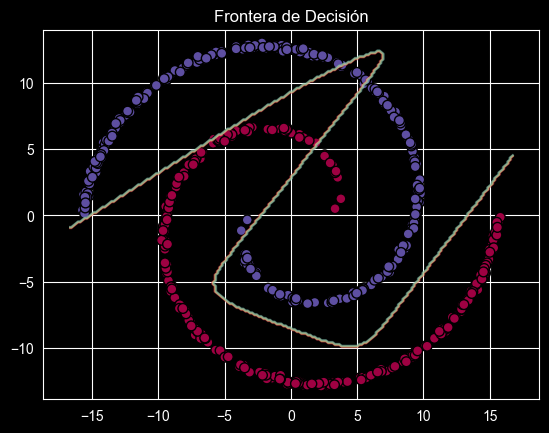

Presición : 96.33333333333334%


In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

def frontera_desicion(X,Y,modelo, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))

    Z = modelo(malla)
    Z=Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión")
    plt.show()


def neurona_superficial(malla):
    Z1=np.dot(w1,malla)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=np.tanh(Z2)
    return (A2 > 0.5).astype(int)

def make_spiral(n_samples=400, vueltas=3, ruido=0.05, seed=1):
    n = n_samples // 2                        # Mitad de los puntos para cada espiral
    theta= np.sqrt(np.random.rand(n))*2*np.pi
    r=2*theta+np.pi

    #Clase 0
    x1=np.array([np.cos(theta)*r, np.sin(theta)*r]).T

    #Clase 1
    x2=np.array([np.cos(theta + np.pi)*r, np.sin(theta + np.pi)*r]).T

    X=np.vstack([x1,x2])
    Y=np.array([0]*n + [1]*n).reshape(-1,1)

    X+=np.random.randn(*X.shape)*ruido
    return X,Y

X,Y=make_spiral(n_samples=600,ruido=0.1)
print("X",X.shape,"Y",Y.shape)
X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=Y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Espiral")
plt.axis("equal")
plt.show()

np.random.seed(1)
n_h=4 #Número de Neuronas en nuestra capa oculta

w1=np.random.rand(n_h,X.shape[0])*0.1
b1=np.zeros((n_h, 1))
w2=np.random.rand(1,n_h)*0.1
b2=np.zeros((1, 1))
#solo un sesgo para nuestra salida

#Tasa de aprendizaje
alpha=0.3
iter=10000

for i in range(iter):

    #Forward Propagation
    Z1=np.dot(w1,X)+b1
    A1= np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2= sigmoid(Z2)
    loss=np.mean(cross_entropy(Y,A2))

    #BackPropagation
    dZ2= A2- Y
    dW2= (1/X.shape[1])*np.dot(dZ2,A1.T)
    db2= (1/X.shape[1])*np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(w2.T,dZ2)
    dZ1=(1-np.power(A1,2))*dA1
    dW1=(1/X.shape[1])*np.dot(dZ1,X.T)
    db1= (1/X.shape[1])*np.sum(dZ1,axis=1,keepdims=True)

    ##Actualización de Parámetros del gradiente descendente
    w1-=alpha*dW1
    b1-=alpha*db1
    w2-=alpha*dW2
    b2-=alpha*db2

    if i % 100==0:
        print(f"Iteración: {i}   Perdida: {loss}")

frontera_desicion(X,Y,neurona_superficial,pasos=200,margen=1)

#Rendmiiento
pred_train = (A2 > 0.5).astype(int)
accuracy= np.mean(pred_train == Y)
print(f"Presición : {accuracy*100}%")

### Prueba de red neuronal superficial para Dataset Espiral

##### RED NEURONAL PROFUNDA
Primer prueba con dataset complejo de espiral

X (6000, 2) Y (6000, 1)
X (2, 6000) Y (1, 6000)


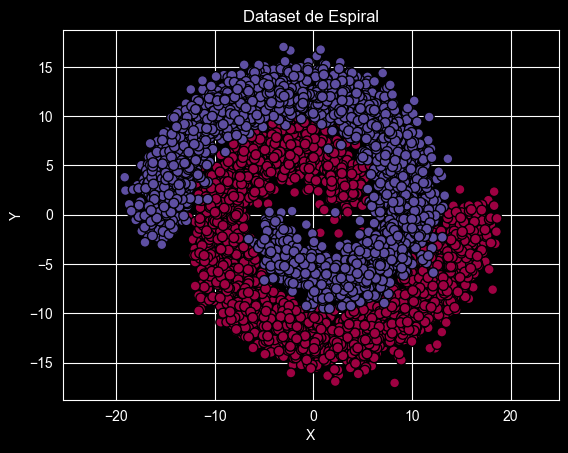

Iteración: 0   Perdida: 0.6779528517993552
Iteración: 100   Perdida: 0.5438306757216995
Iteración: 200   Perdida: 0.5382355947290228
Iteración: 300   Perdida: 0.5367352064607543
Iteración: 400   Perdida: 0.5362179825270538
Iteración: 500   Perdida: 0.536112395457203
Iteración: 600   Perdida: 0.5361776738034303
Iteración: 700   Perdida: 0.536261026296856
Iteración: 800   Perdida: 0.5362991157937461
Iteración: 900   Perdida: 0.5362930473585025
Iteración: 1000   Perdida: 0.5362614500704023
Iteración: 1100   Perdida: 0.5362188225707232
Iteración: 1200   Perdida: 0.536173091662949
Iteración: 1300   Perdida: 0.5361279580331211
Iteración: 1400   Perdida: 0.5360849438013244
Iteración: 1500   Perdida: 0.5360445464490243
Iteración: 1600   Perdida: 0.5360068075875921
Iteración: 1700   Perdida: 0.5359715783709853
Iteración: 1800   Perdida: 0.5359386397009173
Iteración: 1900   Perdida: 0.5359077550796614
Iteración: 2000   Perdida: 0.5358786926822624
Iteración: 2100   Perdida: 0.5358512335290353
Ite

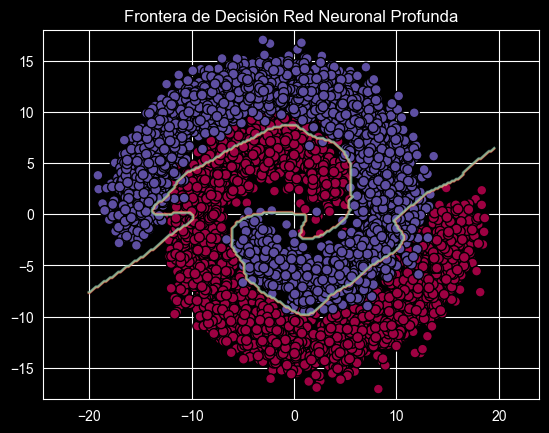

Presición : 95.41666666666667%


In [27]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

def frontera_desicion(X,Y,modelo, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))

    Z = modelo(malla)
    Z=Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión Red Neuronal Profunda")
    plt.show()


def neurona_profunda(malla):
    Z1=np.dot(w1,malla)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=np.tanh(Z2)
    Z3=np.dot(w3,A2)+b3
    A3=np.tanh(Z3)
    Z4=np.dot(w4,A3)+b4
    A4=sigmoid(Z4)
    return (A4 > 0.5).astype(int)

def make_spiral(n_samples=1200, vueltas=6, ruido=0.6, seed=1):
    n = n_samples // 2                        # Mitad de los puntos para cada espiral
    theta= np.sqrt(np.random.rand(n))*2*np.pi
    r=2*theta+np.pi

    #Clase 0
    x1=np.array([np.cos(theta)*r, np.sin(theta)*r]).T

    #Clase 1
    x2=np.array([np.cos(theta + np.pi)*r, np.sin(theta + np.pi)*r]).T

    X=np.vstack([x1,x2])
    Y=np.array([0]*n + [1]*n).reshape(-1,1)

    X+=np.random.randn(*X.shape)*ruido
    return X,Y

X,Y=make_spiral(n_samples=6000,ruido=1.4)
print("X",X.shape,"Y",Y.shape)
X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0,:],X[1,:],c=Y.ravel(),s=50,cmap=plt.cm.Spectral,edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset de Espiral")
plt.axis("equal")
plt.show()

np.random.seed(1)
n_h1=16 #Número de Neuronas en nuestra capa oculta
n_h2=8 #Número de Neuronas en nuestra capa oculta
n_h3=8 #Número de Neuronas en nuestra capa oculta

#Inicialización de parametros
w1=np.random.rand(n_h1,X.shape[0])*0.1
b1=np.zeros((n_h1, 1))
w2=np.random.rand(n_h2,n_h1)*0.1
b2=np.zeros((n_h2, 1))
w3=np.random.rand(n_h3,n_h2)*0.1
b3=np.zeros((n_h3, 1))
w4=np.random.rand(1,n_h3)*0.1
b4=np.zeros((1, 1))
#solo un sesgo para nuestra salida

#Tasa de aprendizaje
alpha=0.3
iter=23000

for i in range(iter):

    #Forward Propagation
    Z1=np.dot(w1,X)+b1
    A1= np.tanh(Z1)

    Z2=np.dot(w2,A1)+b2
    A2= np.tanh(Z2)

    Z3=np.dot(w3,A2)+b3
    A3=np.tanh(Z3)

    Z4=np.dot(w4,A3)+b4
    A4=sigmoid(Z4)

    loss=np.mean(cross_entropy(Y,A4))

    #BackPropagation

    dZ4 = A4 - Y
    dw4 = (1/X.shape[1]) * np.dot(dZ4, A3.T)
    db4 = (1/X.shape[1]) * np.sum(dZ4, axis=1, keepdims=True)

    dA3 = np.dot(w4.T, dZ4)
    dZ3 = (1 - np.power(A3,2)) * dA3
    dw3=(1/X.shape[1])*np.dot(dZ3,A2.T)
    db3=(1/X.shape[1]) *np.sum(dZ3,axis=1,keepdims=True)

    dA2=np.dot(w3.T,dZ3)
    dZ2= (1-np.power(A2,2))*dA2
    dW2= (1/X.shape[1])*np.dot(dZ2,A1.T)
    db2= (1/X.shape[1])*np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(w2.T,dZ2)
    dZ1=(1-np.power(A1,2))*dA1
    dW1=(1/X.shape[1])*np.dot(dZ1,X.T)
    db1= (1/X.shape[1])*np.sum(dZ1,axis=1,keepdims=True)

    ##Actualización de Parámetros del gradiente descendente
    w1-=alpha*dW1
    b1-=alpha*db1
    w2-=alpha*dW2
    b2-=alpha*db2
    w3-=alpha*dw3
    b3-=alpha*db3
    w4-=alpha*dw4
    b4-=alpha*db4

    if i % 100==0:
        print(f"Iteración: {i}   Perdida: {loss}")

frontera_desicion(X,Y,neurona_profunda,pasos=200,margen=1)

#Rendmiiento
pred_train = (A4 > 0.5).astype(int)
accuracy= np.mean(pred_train == Y)
print(f"Presición : {accuracy*100}%")

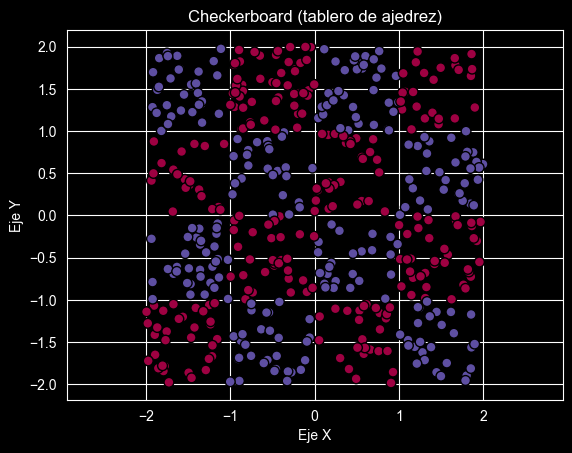

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def dataset_checkerboard(n_ejemplos=500, rango=2.0, seed=1):
    """
    Genera un dataset tipo tablero de ajedrez (CHECKBOARD)
    - Clases alternadas por cuadros en el plano (patrón par/impar)
    Formato:
      X: (2, m), Y: (1, m)
    """
    nums = np.random.default_rng(seed)    # Generador aleatorio reproducible

    # Muestra coordenadas uniformes en el cuadrado [-rango, rango] × [-rango, rango]
    x = nums.uniform(-rango, rango, n_ejemplos)  # Vector de x de tamaño m
    y = nums.uniform(-rango, rango, n_ejemplos)  # Vector de y de tamaño m

    # Asigna clase alternando por “cuadros”:
    # Tomamos floor(x) y floor(y), sumamos y miramos si es par (0) o impar (1)
    etiquetas = ((np.floor(x) + np.floor(y)) % 2).astype(int)

    # Ajuste de formato de salida
    X = np.vstack([x, y])                # Datos como matriz 2×m (fila 0 = x, fila 1 = y)
    Y = etiquetas.reshape(1, -1)         # Etiquetas como vector fila 1×m

    return X, Y                          # Devuelve datos y etiquetas

# Grafica
X_chk, y_chk = dataset_checkerboard()           # Genera tablero
plt.scatter(X_chk[0, :], X_chk[1, :],                                           # Grafica puntos
            c=y_chk.ravel(), cmap=plt.cm.Spectral, edgecolors='k', s=50)         # Colorea por clase
plt.title("Checkerboard (tablero de ajedrez)")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.axis('equal')                                                                # Escala uniforme
plt.show()                                                                       # Muestra la figura

X (2, 5000) Y (1, 5000)
X (2, 5000) Y (1, 5000)


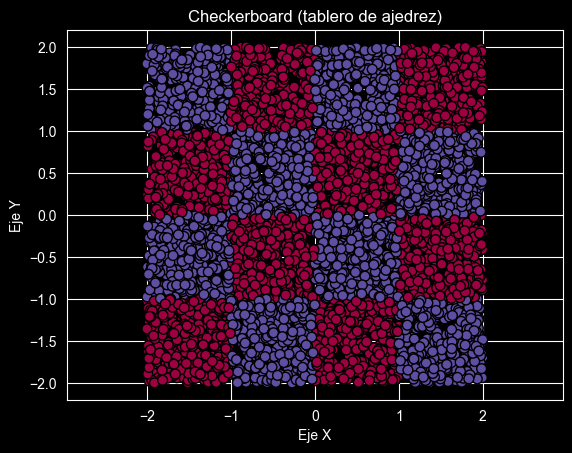

Iteración: 0   Perdida: 0.6931136494308369
Iteración: 100   Perdida: 0.6931073975089472
Iteración: 200   Perdida: 0.6931010408662632
Iteración: 300   Perdida: 0.6930945061448263
Iteración: 400   Perdida: 0.6930877471220936
Iteración: 500   Perdida: 0.6930807392087114
Iteración: 600   Perdida: 0.6930734798595356
Iteración: 700   Perdida: 0.6930659894415441
Iteración: 800   Perdida: 0.6930583118746588
Iteración: 900   Perdida: 0.6930505143196044
Iteración: 1000   Perdida: 0.6930426852044111
Iteración: 1100   Perdida: 0.6930349300370314
Iteración: 1200   Perdida: 0.6930273648013819
Iteración: 1300   Perdida: 0.6930201072704156
Iteración: 1400   Perdida: 0.6930132671879379
Iteración: 1500   Perdida: 0.6930069367737066
Iteración: 1600   Perdida: 0.6930011831719908
Iteración: 1700   Perdida: 0.6929960441604596
Iteración: 1800   Perdida: 0.6929915277192938
Iteración: 1900   Perdida: 0.6929876151737977
Iteración: 2000   Perdida: 0.6929842668868074
Iteración: 2100   Perdida: 0.6929814291232802


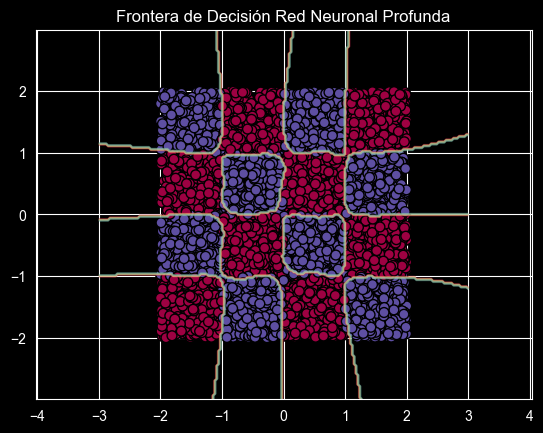

Presición : 97.32%


In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cross_entropy(y_verdadero,a):
    return -(y_verdadero*np.log(a + 1e-8) + (1-y_verdadero)*np.log(1-a+ 1e-8))
    # 1e-8 valor de seguridad para evitar errores cuando usamos logaritmos

def frontera_desicion(X,Y,modelo, pasos=200, margen=1.0, umbral=0.5):
    x_min, x_max = X[0,:].min() - margen, X[0,:].max() + margen
    y_min, y_max = X[1,:].min() - margen, X[1,:].max() + margen

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, pasos),
        np.linspace(y_min, y_max, pasos)
    )

    malla = np.vstack((xx.ravel(), yy.ravel()))

    Z = modelo(malla)
    Z=Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, alpha=0.3,cmap=plt.cm.Spectral)
    plt.scatter(X[0,:], X[1,:], c=Y.ravel(),
                cmap=plt.cm.Spectral, edgecolors='k', s=50)
    plt.axis("equal")
    plt.title("Frontera de Decisión Red Neuronal Profunda")
    plt.show()


def neurona_profunda(malla):
    Z1=np.dot(w1,malla)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=np.tanh(Z2)
    Z3=np.dot(w3,A2)+b3
    A3=np.tanh(Z3)
    Z4=np.dot(w4,A3)+b4
    A4=sigmoid(Z4)
    return (A4 > 0.5).astype(int)

def dataset_checkerboard(n_ejemplos=500, rango=2.0, seed=1):
    """
    Genera un dataset tipo tablero de ajedrez (CHECKBOARD)
    - Clases alternadas por cuadros en el plano (patrón par/impar)
    Formato:
      X: (2, m), Y: (1, m)
    """
    nums = np.random.default_rng(seed)    # Generador aleatorio reproducible

    # Muestra coordenadas uniformes en el cuadrado [-rango, rango] × [-rango, rango]
    x = nums.uniform(-rango, rango, n_ejemplos)  # Vector de x de tamaño m
    y = nums.uniform(-rango, rango, n_ejemplos)  # Vector de y de tamaño m

    # Asigna clase alternando por “cuadros”:
    # Tomamos floor(x) y floor(y), sumamos y miramos si es par (0) o impar (1)
    etiquetas = ((np.floor(x) + np.floor(y)) % 2).astype(int)

    # Ajuste de formato de salida
    X = np.vstack([x, y])                # Datos como matriz 2×m (fila 0 = x, fila 1 = y)
    Y = etiquetas.reshape(1, -1)         # Etiquetas como vector fila 1×m

    return X, Y                          # Devuelve datos y etiquetas

X,Y=dataset_checkerboard(n_ejemplos=5000,rango=2.0, seed=1)
print("X",X.shape,"Y",Y.shape)
##X=X.T
Y=Y.reshape(1,-1)
print("X",X.shape,"Y",Y.shape)

#Graficar
plt.scatter(X[0, :], X[1, :],c=Y.ravel(), cmap=plt.cm.Spectral, edgecolors='k', s=50)         # Colorea por clase
plt.title("Checkerboard (tablero de ajedrez)")
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.axis('equal')                                                                # Escala uniforme
plt.show()

np.random.seed(1)
n_h1=16 #Número de Neuronas en nuestra capa oculta
n_h2=8 #Número de Neuronas en nuestra capa oculta
n_h3=8 #Número de Neuronas en nuestra capa oculta

#Inicialización de parametros
w1=np.random.rand(n_h1,X.shape[0])*0.1
b1=np.zeros((n_h1, 1))
w2=np.random.rand(n_h2,n_h1)*0.1
b2=np.zeros((n_h2, 1))
w3=np.random.rand(n_h3,n_h2)*0.1
b3=np.zeros((n_h3, 1))
w4=np.random.rand(1,n_h3)*0.1
b4=np.zeros((1, 1))
#solo un sesgo para nuestra salida

#Tasa de aprendizaje
alpha=0.3
iter=23000

for i in range(iter):

    #Forward Propagation
    Z1=np.dot(w1,X)+b1
    A1= np.tanh(Z1)

    Z2=np.dot(w2,A1)+b2
    A2= np.tanh(Z2)

    Z3=np.dot(w3,A2)+b3
    A3=np.tanh(Z3)

    Z4=np.dot(w4,A3)+b4
    A4=sigmoid(Z4)

    loss=np.mean(cross_entropy(Y,A4))

    #BackPropagation

    dZ4 = A4 - Y
    dw4 = (1/X.shape[1]) * np.dot(dZ4, A3.T)
    db4 = (1/X.shape[1]) * np.sum(dZ4, axis=1, keepdims=True)

    dA3 = np.dot(w4.T, dZ4)
    dZ3 = (1 - np.power(A3,2)) * dA3
    dw3=(1/X.shape[1])*np.dot(dZ3,A2.T)
    db3=(1/X.shape[1]) *np.sum(dZ3,axis=1,keepdims=True)

    dA2=np.dot(w3.T,dZ3)
    dZ2= (1-np.power(A2,2))*dA2
    dW2= (1/X.shape[1])*np.dot(dZ2,A1.T)
    db2= (1/X.shape[1])*np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(w2.T,dZ2)
    dZ1=(1-np.power(A1,2))*dA1
    dW1=(1/X.shape[1])*np.dot(dZ1,X.T)
    db1= (1/X.shape[1])*np.sum(dZ1,axis=1,keepdims=True)

    ##Actualización de Parámetros del gradiente descendente
    w1-=alpha*dW1
    b1-=alpha*db1
    w2-=alpha*dW2
    b2-=alpha*db2
    w3-=alpha*dw3
    b3-=alpha*db3
    w4-=alpha*dw4
    b4-=alpha*db4

    if i % 100==0:
        print(f"Iteración: {i}   Perdida: {loss}")

frontera_desicion(X,Y,neurona_profunda,pasos=200,margen=1)

#Rendmiiento
pred_train = (A4 > 0.5).astype(int)
accuracy= np.mean(pred_train == Y)
print(f"Presición : {accuracy*100}%")